# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

# Overall promoter methylation

We'll analyse methylation in Lower Grade Glioma (brain cancer).

First, let's look at overall methylation landscape in LGG. 

We have methylation signal of 1000 cytosines in CpH islands in gene promoters.

In [6]:
#!wget https://github.com/bels4/Stepik/blob/main/04_Fundamental_research/02_Epigenetics/1000_island_promoter_probes.tsv

island_promoter_methylation = pd.read_csv('./1000_island_promoter_probes.tsv', sep='\t', index_col=0)
island_promoter_methylation.shape

(1000, 518)

In [7]:
island_promoter_methylation.head()

,TCGA-CS-4938-01,TCGA-CS-4941-01,TCGA-CS-4942-01,TCGA-CS-4943-01,TCGA-CS-4944-01,TCGA-CS-5390-01,TCGA-CS-5393-01,TCGA-CS-5394-01,TCGA-CS-5395-01,TCGA-CS-5396-01,TCGA-CS-5397-01,TCGA-CS-6186-01,TCGA-CS-6188-01,TCGA-CS-6290-01,TCGA-CS-6666-01,TCGA-CS-6667-01,TCGA-CS-6668-01,TCGA-CS-6669-01,TCGA-CS-6670-01,TCGA-DB-5270-01,TCGA-DB-5273-01,TCGA-DB-5274-01,TCGA-DB-5275-01,TCGA-DB-5276-01,TCGA-DB-5277-01,TCGA-DB-5278-01,TCGA-DB-5279-01,TCGA-DB-5280-01,TCGA-DB-5281-01,TCGA-DB-A4X9-01,TCGA-DB-A4XA-01,TCGA-DB-A4XB-01,TCGA-DB-A4XC-01,TCGA-DB-A4XD-01,TCGA-DB-A4XE-01,TCGA-DB-A4XF-01,TCGA-DB-A4XG-01,TCGA-DB-A4XH-01,TCGA-DB-A64L-01,TCGA-DB-A64O-01,...,TCGA-TQ-A7RF-01,TCGA-TQ-A7RG-01,TCGA-TQ-A7RH-01,TCGA-TQ-A7RI-01,TCGA-TQ-A7RJ-01,TCGA-TQ-A7RK-01,TCGA-TQ-A7RM-01,TCGA-TQ-A7RN-01,TCGA-TQ-A7RO-01,TCGA-TQ-A7RP-01,TCGA-TQ-A7RQ-01,TCGA-TQ-A7RR-01,TCGA-TQ-A7RS-01,TCGA-TQ-A7RU-01,TCGA-TQ-A7RV-01,TCGA-TQ-A7RV-02,TCGA-TQ-A7RW-01,TCGA-TQ-A8XE-01,TCGA-TQ-A8XE-02,TCGA-VM-A8C8-01,TCGA-VM-A8C9-01,TCGA-VM-A8CA-01,TCGA-VM-A8CB-01,TCGA-VM-A8CD-01,TCGA-VM-A8CE-01,TCGA-VM-A8CF-01,TCGA-VM-A8CH-01,TCGA-VV-A829-01,TCGA-VV-A86M-01,TCGA-VW-A7QS-01,TCGA-VW-A8FI-01,TCGA-W9-A837-01,TCGA-WH-A86K-01,TCGA-WY-A858-01,TCGA-WY-A859-01,TCGA-WY-A85A-01,TCGA-WY-A85B-01,TCGA-WY-A85C-01,TCGA-WY-A85D-01,TCGA-WY-A85E-01
Probe_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cg02099053,0.1229,0.03156,0.05682,0.4739,0.7380,0.3203,0.6523,0.08575,0.03854,0.05798,0.08180,0.04310,0.10830,0.4568,0.4854,0.7390,0.9250,0.08673,0.1131,0.3987,0.3460,0.0632,0.5254,0.08185,0.11145,0.10114,0.1066,0.8770,0.3901,0.0667,0.3928,0.46900,0.3360,0.3843,0.1216,0.2231,0.08295,0.8364,0.7620,0.03854,...,0.5870,0.1043,0.0717,0.2341,0.7560,0.6235,0.04376,0.07336,0.0828,0.04370,0.0835,0.38600,0.08374,0.1199,0.1576,0.08887,0.2018,0.14100,0.46390,0.04477,0.03815,0.09937,0.0658,0.04465,0.0885,0.04187,0.4282,0.0543,0.4763,0.0861,0.03918,0.10095,0.04053,0.1165,0.07367,0.3413,0.2988,0.8735,0.3680,0.4390
cg24382527,0.4730,0.02005,0.53400,0.6694,0.5100,0.2732,0.6636,0.76500,0.02650,0.65430,0.02083,0.01584,0.03088,0.4233,0.7730,0.7197,0.8174,0.02051,0.4128,0.4980,0.4800,0.3030,0.5986,0.54800,0.80900,0.19570,0.7720,0.1941,0.6357,0.8090,0.5337,0.05994,0.5024,0.6523,0.7210,0.7417,0.29500,0.7630,0.6147,0.02214,...,0.5630,0.5854,0.3740,0.1700,0.5435,0.7676,0.92000,0.54930,0.4216,0.01688,0.6880,0.40530,0.47220,0.8110,0.4485,0.40230,0.5806,0.47600,0.52500,0.18900,0.01617,0.59330,0.1593,0.02040,0.3733,0.56000,0.6973,0.1818,0.4795,0.6810,0.01252,0.33250,0.72950,0.5830,0.55700,0.3027,0.2198,0.7446,0.6777,0.4973
cg17094014,0.8350,0.05902,0.75700,0.9050,0.7246,0.8486,0.7944,0.89000,0.03546,0.89500,0.07764,0.50800,0.03256,0.6670,0.8690,0.8145,0.9487,0.03564,0.8286,0.6494,0.7620,0.7764,0.8784,0.55400,0.88960,0.76400,0.9120,0.8950,0.8706,0.8633,0.7515,0.92870,0.7300,0.9000,0.8384,0.8364,0.92240,0.8145,0.7593,0.02680,...,0.8230,0.8420,0.8460,0.7920,0.7417,0.8550,0.92970,0.81930,0.7705,0.02635,0.8850,0.75900,0.87600,0.9375,0.8290,0.55000,0.7583,0.78270,0.78560,0.79930,0.04532,0.74070,0.8916,0.47600,0.6820,0.77730,0.7910,0.9260,0.8926,0.8940,0.15480,0.74500,0.82030,0.6580,0.73900,0.7065,0.8276,0.8450,0.8400,0.7803
cg19653594,0.8003,0.09720,0.08380,0.4148,0.7827,0.7046,0.2737,0.84030,0.09607,0.86330,0.35080,0.37840,0.25370,0.4540,0.8110,0.5020,0.9004,0.26680,0.8150,0.4314,0.3071,0.7480,0.3855,0.51660,0.06990,0.62160,0.8720,0.5320,0.9106,0.4968,0.7260,0.46020,0.1705,0.2993,0.1075,0.4766,0.64940,0.8460,0.3618,0.54350,...,0.6206,0.3235,0.3054,0.1956,0.2976,0.9155,0.53600,0.49240,0.4414,0.45070,0.8486,0.16740,0.83600,0.8887,0.7153,0.61100,0.4275,0.09357,0.20890,0.12415,0.24500,0.71900,0.1655,0.13980,0.6265,0.68700,0.4749,0.8867,0.4053,0.8276,0.25100,0.75150,0.31960,0.3223,0.50440,0.5884,0.7095,0.4114,0.4760,0.1736
cg09963123,0.5054,0.12120,0.49000,0.4446,0.6343,0.6140,0.1959,0.64940,0.14110,0.48730,0.06350,0.09174,0.08124,0.6780,0.4937,0.2316,0.9380,0.11993,0.5470,0.6270,0.4620,0.7993,0.5327,0.50830,0.48400,

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


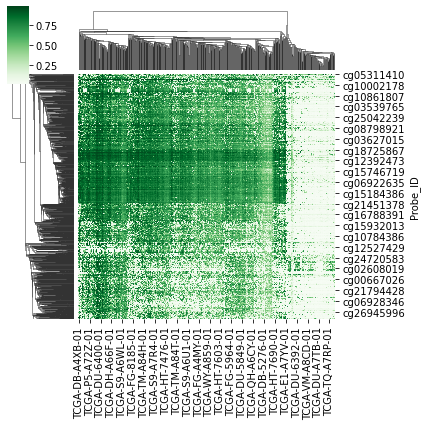

In [8]:
sns.clustermap(island_promoter_methylation, cmap=matplotlib.cm.Greens, figsize=(6, 6))

We see two clusters of samples: with low and high methylation. What is the biology of these two clusters?

Many samples in LGG have mutated IDH gene.

In [9]:
idh_annotation = pd.read_csv('./IDH_mutation_annotation.tsv', sep='\t', index_col=0)['IDH_status']
idh_annotation.shape

(518,)

In [10]:
idh_annotation

TCGA-CS-4938-01    Mutant
TCGA-CS-4941-01        WT
TCGA-CS-4942-01    Mutant
TCGA-CS-4943-01    Mutant
TCGA-CS-4944-01    Mutant
                    ...  
TCGA-WY-A85A-01    Mutant
TCGA-WY-A85B-01    Mutant
TCGA-WY-A85C-01    Mutant
TCGA-WY-A85D-01    Mutant
TCGA-WY-A85E-01    Mutant
Name: IDH_status, Length: 518, dtype: object

We see two clusters of methylaltion: hyper and hypo methylated samples. How are these clusters associated with IDH mutation?

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


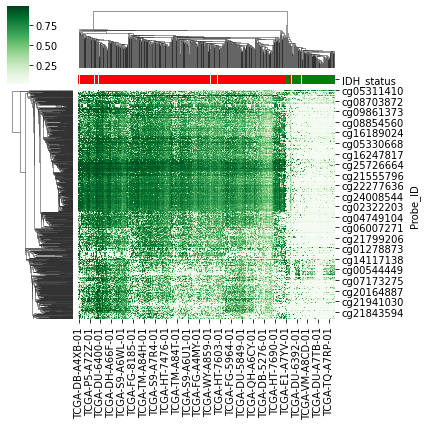

In [11]:
sns.clustermap(island_promoter_methylation, cmap=matplotlib.cm.Greens,
              col_colors=idh_annotation.map({'WT': "green", 'Mutant': "red"}),
              figsize=(6, 6))

IDH-mut samples have hypermethylated phenotype, IDH-wt samples - hypomethylated. This happens, because mutated IDH inhibits demethylation in cancer cells.

**Task 1**

Calcultate mean island promoter methylation in IDHmut and IHDwt groups

In [14]:
IDHmut = idh_annotation[idh_annotation == 'Mutant'].index
IDHwt = idh_annotation[idh_annotation == 'WT'].index

In [20]:
island_promoter_methylation.loc[:, IDHmut].mean().mean()

0.5620234736334953

In [21]:
island_promoter_methylation.loc[:, IDHwt].mean().mean()

0.10706797944680847

# MLH3  methylation

Next we'll analyse methylation of gene MLH3.

MLH3 gene maintains genomic integrity during DNA replication. It is involved in DNA mismatch repair pathway. Cancer cells often silence this gene to acquire more mutations. MLH3 can be silenced by mutation, deletion or hypermethylation.

## Promoter

Let's look at methylation of MLH3 promoter

In [22]:
mlh3_methylation_promoter = pd.read_csv('./MLH3_promoter_probes_methylation.tsv', sep='\t', index_col=0)
mlh3_methylation_promoter.shape

(3, 518)

In [23]:
mlh3_methylation_promoter

,TCGA-S9-A7J2-01,TCGA-VM-A8C8-01,TCGA-E1-A7YI-01,TCGA-DU-7302-01,TCGA-P5-A5EX-01,TCGA-HT-8563-01,TCGA-FG-A60K-01,TCGA-RY-A83X-01,TCGA-DU-A5TR-01,TCGA-CS-5397-01,TCGA-HT-8558-01,TCGA-DU-A7TI-01,TCGA-S9-A6U8-01,TCGA-DU-5870-01,TCGA-HT-7467-01,TCGA-HT-7874-01,TCGA-S9-A6TV-01,TCGA-HT-7616-01,TCGA-KT-A7W1-01,TCGA-DU-6410-01,TCGA-P5-A5F2-01,TCGA-HT-7607-01,TCGA-HT-7873-01,TCGA-HT-7603-01,TCGA-DB-A64P-01,TCGA-P5-A5F1-01,TCGA-DU-7011-01,TCGA-P5-A77X-01,TCGA-RY-A843-01,TCGA-HW-7493-01,TCGA-VM-A8CA-01,TCGA-TM-A84O-01,TCGA-S9-A7R3-01,TCGA-TQ-A7RN-01,TCGA-P5-A735-01,TCGA-HT-7691-01,TCGA-FG-A6J1-01,TCGA-S9-A7R7-01,TCGA-DU-6402-01,TCGA-HT-7684-01,...,TCGA-TQ-A7RK-01,TCGA-HT-7475-01,TCGA-TQ-A7RO-01,TCGA-HT-7902-01,TCGA-FG-A711-01,TCGA-DB-5276-01,TCGA-P5-A730-01,TCGA-E1-A7YD-01,TCGA-HT-8015-01,TCGA-DU-7294-01,TCGA-DH-A669-02,TCGA-DH-A669-01,TCGA-HT-A617-01,TCGA-DU-A6S6-01,TCGA-QH-A6X5-01,TCGA-HT-7605-01,TCGA-S9-A6WO-01,TCGA-QH-A6CX-01,TCGA-DU-A76L-01,TCGA-P5-A5F4-01,TCGA-S9-A6UA-01,TCGA-VM-A8CH-01,TCGA-HT-7609-01,TCGA-QH-A6X4-01,TCGA-DH-A7UV-01,TCGA-TM-A7C3-01,TCGA-S9-A6WG-01,TCGA-FG-6690-01,TCGA-DU-8167-01,TCGA-QH-A65X-01,TCGA-HW-8319-01,TCGA-P5-A780-01,TCGA-E1-5302-01,TCGA-HW-A5KJ-01,TCGA-FG-7636-01,TCGA-CS-6290-01,TCGA-DU-5847-01,TCGA-DU-6406-01,TCGA-TM-A84B-01,TCGA-DU-A76O-01
Probe_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cg01188068,0.7640,0.04553,0.4917,0.6650,0.4875,0.03998,0.07990,0.03708,0.4639,0.03223,0.04132,0.5260,0.1472,0.4177,0.2937,0.05870,0.03256,0.3953,0.03525,0.8650,0.4072,0.2830,0.06366,0.3367,0.5640,0.32800,0.2605,0.6445,0.4216,0.4473,0.2927,0.0362,0.5870,0.4292,0.4963,0.03745,0.4634,0.03406,0.03336,0.1690,...,0.7827,0.41670,0.4314,0.03314,0.3828,0.4265,0.3262,0.02148,0.04013,0.13590,0.3933,0.4749,0.03577,0.4478,0.4390,0.07806,0.3710,0.04572,0.03268,0.5938,0.04984,0.4216,0.3490,0.03653,0.7550,0.03586,0.16910,0.4724,0.08234,0.7260,0.05606,0.3997,0.03930,0.6690,0.15450,0.3450,0.02592,0.02815,0.03497,0.3489
cg05361542,0.5537,0.17980,0.4546,0.6040,0.4760,0.03390,0.09750,0.04430,0.3880,0.16560,0.04523,0.4333,0.0848,0.3877,0.1768,0.07350,0.05838,0.3289,0.04895,0.8237,0.1107,0.2551,0.04422,0.1545,0.6826,0.10425,0.1672,0.6130,0.2607,0.3670,0.2710,0.0815,0.6104,0.4424,0.2660,0.05905,0.3843,0.05737,0.05914,0.0871,...,0.7534,0.08374,0.3530,0.05136,0.3757,0.4136,0.2698,0.04102,0.04605,0.05496,0.3604,0.4543,0.03214,0.2218,0.4016,0.08540,0.2428,0.05453,0.04367,0.2944,0.05524,0.1713,0.1577,0.06537,0.7344,0.04538,0.05045,0.1958,0.10940,0.5376,0.22070,0.3740,0.05582,0.6580,0.06335,0.2109,0.06305,0.05000,0.04282,0.2350
cg24482053,0.5884,0.10070,0.4395,0.6187,0.4976,0.04474,0.12494,0.05730,0.3982,0.19950,0.06143,0.3080,0.1342,0.4020,0.2465,0.06995,0.03485,0.3162,0.04318,0.8677,0.1034,0.2580,0.06274,0.1770,0.5630,0.18880,0.2869,0.6160,0.2651,0.3987,0.2610,0.0798,0.6323,0.4395,0.4856,0.05830,0.3604,0.05408,0.12024,0.1406,...,0.7705,0.08374,0.3610,0.04900,0.3720,0.4343,0.2917,0.04572,0.05084,0.08880,0.3396,0.4373,0.04507,0.3936,0.3810,0.10205,0.4893,0.06430,0.06660,0.3914,0.07890,0.3720,0.2354,0.07540,0.7256,0.05234,0.06476,0.3064,0.15830,0.7300,0.25540,0.3618,0.07920,0.6885,0.07996,0.2637,0.03485,0.04327,0.07117,0.4430


In [24]:
mlh3_expression = pd.read_csv('./MLH3_expression.tsv', sep='\t', index_col=0)['MLH3_expression']
mlh3_expression.shape

(518,)

In [25]:
mlh3_expression

TCGA-S9-A7J2-01    2.873909
TCGA-VM-A8C8-01    4.552325
TCGA-E1-A7YI-01    3.881596
TCGA-DU-7302-01    2.443661
TCGA-P5-A5EX-01    2.516302
                     ...   
TCGA-CS-6290-01    3.339304
TCGA-DU-5847-01    3.412569
TCGA-DU-6406-01    3.994245
TCGA-TM-A84B-01    3.923671
TCGA-DU-A76O-01    3.124447
Name: MLH3_expression, Length: 518, dtype: float64

Count mean methylation of promoter

In [26]:
mlh3_methylation_promoter_mean = mlh3_methylation_promoter.mean()
mlh3_methylation_promoter_mean = mlh3_methylation_promoter_mean.rename("MLH3_mean_promoter_methylation")

In [27]:
mlh3_methylation_promoter_mean

TCGA-S9-A7J2-01    0.635367
TCGA-VM-A8C8-01    0.108677
TCGA-E1-A7YI-01    0.461933
TCGA-DU-7302-01    0.629233
TCGA-P5-A5EX-01    0.487033
                     ...   
TCGA-CS-6290-01    0.273200
TCGA-DU-5847-01    0.041273
TCGA-DU-6406-01    0.040473
TCGA-TM-A84B-01    0.049653
TCGA-DU-A76O-01    0.342300
Name: MLH3_mean_promoter_methylation, Length: 518, dtype: float64

Is there correlation between promoter methylation and expression?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


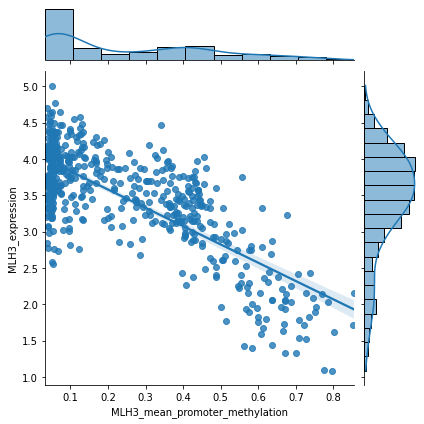

In [28]:
sns.jointplot(mlh3_methylation_promoter_mean, mlh3_expression, kind='reg')

**Task 2**  
Count Spearman correlation

In [30]:
import scipy
scipy.stats.spearmanr(mlh3_methylation_promoter_mean, mlh3_expression)

SpearmanrResult(correlation=-0.6256979888058479, pvalue=1.2227847486083705e-57)

**Task 3.1**    
Let's calculate how many samples have methylated and umnethylated MLH3 promoter?   
To solve this, first find the threshold for promoter methylatin using sns.distplot(). Select theshold from 0, 0.1, 0.2, ..., 0.9, 1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


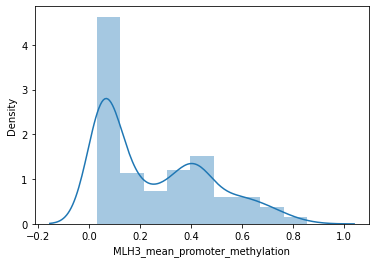

In [35]:
sns.distplot(mlh3_methylation_promoter_mean)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


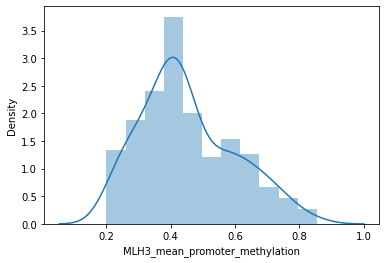

In [40]:
sns.distplot(mlh3_methylation_promoter_mean[mlh3_methylation_promoter_mean > 0.2])

**Task 3.2**    
Now calculate how many samples have methylated and umnethylated MLH3 promoter?   

In [41]:
mlh3_methylation_promoter_mean[mlh3_methylation_promoter_mean > 0.2]

TCGA-S9-A7J2-01    0.635367
TCGA-E1-A7YI-01    0.461933
TCGA-DU-7302-01    0.629233
TCGA-P5-A5EX-01    0.487033
TCGA-DU-A5TR-01    0.416700
                     ...   
TCGA-QH-A65X-01    0.664533
TCGA-P5-A780-01    0.378500
TCGA-HW-A5KJ-01    0.671833
TCGA-CS-6290-01    0.273200
TCGA-DU-A76O-01    0.342300
Name: MLH3_mean_promoter_methylation, Length: 251, dtype: float64

## Gene body 

Let's look at methylation of MLH3 gene body

In [36]:
mlh3_methylation_body = pd.read_csv('./MLH3_gene_body_probes_methylation.tsv', sep='\t', index_col=0)
mlh3_methylation_body.shape

(2, 518)

Count mean methylation of gene body

In [37]:
mlh3_methylation_body_mean = mlh3_methylation_body.mean()
mlh3_methylation_body_mean = mlh3_methylation_body_mean.rename("MLH3_mean_gene_body_methylation")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


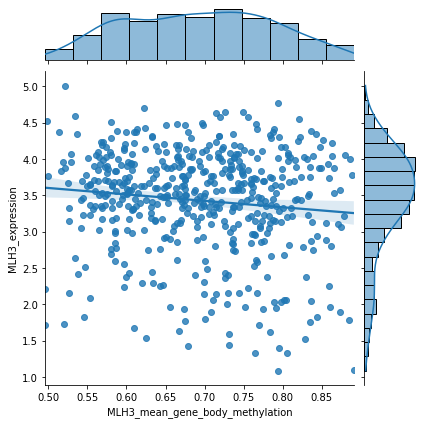

In [38]:
sns.jointplot(mlh3_methylation_body_mean, mlh3_expression, kind='reg')

**Task 4**  

Count Sperman correlation

In [42]:
import scipy
scipy.stats.spearmanr(mlh3_methylation_body_mean, mlh3_expression)

SpearmanrResult(correlation=-0.0896470670661226, pvalue=0.041399002763840585)

## MLH3 methylation and IDH mutation

Is there any difference in MLH3 methylation in IDH-mutatant and IDH-wild-type samples?

Let's make dataframe with data, which are necessary for plotting

In [43]:
mlh3_methylation = pd.DataFrame()

In [44]:
mlh3_methylation['Promoter'] = mlh3_methylation_promoter_mean

In [45]:
mlh3_methylation['Body'] = mlh3_methylation_body_mean

In [46]:
mlh3_methylation['IDH_status'] = idh_annotation

In [47]:
mlh3_methylation

,Promoter,Body,IDH_status
TCGA-S9-A7J2-01,0.635367,0.77580,Mutant
TCGA-VM-A8C8-01,0.108677,0.82030,Mutant
TCGA-E1-A7YI-01,0.461933,0.52180,Mutant
TCGA-DU-7302-01,0.629233,0.63315,Mutant
TCGA-P5-A5EX-01,0.487033,0.54730,Mutant
...,...,...,...
TCGA-CS-6290-01,0.273200,0.71510,Mutant
TCGA-DU-5847-01,0.041273,0.72095,WT
TCGA-DU-6406-01,0.040473,0.83120,WT
TCGA-TM-A84B-01,0.049653,0.56550,WT


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


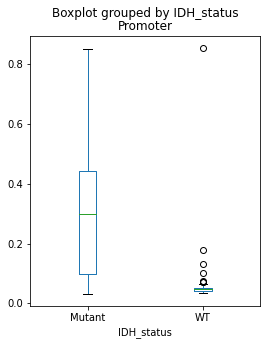

In [48]:
pd.DataFrame(mlh3_methylation).boxplot(column='Promoter', by='IDH_status', grid=False, figsize=(4, 5))

MLH3 methylation in promoter is higher in IDH-mutant samples.

**Task 5**  

What % of IDHmut samples have hypermethylated MLH3?
What % of IDHwt samples have hypermethylated MLH3?

In [49]:
mlh3_methylation

,Promoter,Body,IDH_status
TCGA-S9-A7J2-01,0.635367,0.77580,Mutant
TCGA-VM-A8C8-01,0.108677,0.82030,Mutant
TCGA-E1-A7YI-01,0.461933,0.52180,Mutant
TCGA-DU-7302-01,0.629233,0.63315,Mutant
TCGA-P5-A5EX-01,0.487033,0.54730,Mutant
...,...,...,...
TCGA-CS-6290-01,0.273200,0.71510,Mutant
TCGA-DU-5847-01,0.041273,0.72095,WT
TCGA-DU-6406-01,0.040473,0.83120,WT
TCGA-TM-A84B-01,0.049653,0.56550,WT


In [56]:
part = mlh3_methylation.loc[mlh3_methylation.IDH_status == 'Mutant']
part

,Promoter,Body,IDH_status
TCGA-S9-A7J2-01,0.635367,0.77580,Mutant
TCGA-VM-A8C8-01,0.108677,0.82030,Mutant
TCGA-E1-A7YI-01,0.461933,0.52180,Mutant
TCGA-DU-7302-01,0.629233,0.63315,Mutant
TCGA-P5-A5EX-01,0.487033,0.54730,Mutant
...,...,...,...
TCGA-E1-5302-01,0.058107,0.75950,Mutant
TCGA-HW-A5KJ-01,0.671833,0.67395,Mutant
TCGA-FG-7636-01,0.099270,0.67550,Mutant
TCGA-CS-6290-01,0.273200,0.71510,Mutant


In [57]:
part[part.Promoter > 0.2]

,Promoter,Body,IDH_status
TCGA-S9-A7J2-01,0.635367,0.77580,Mutant
TCGA-E1-A7YI-01,0.461933,0.52180,Mutant
TCGA-DU-7302-01,0.629233,0.63315,Mutant
TCGA-P5-A5EX-01,0.487033,0.54730,Mutant
TCGA-DU-A5TR-01,0.416700,0.77150,Mutant
...,...,...,...
TCGA-QH-A65X-01,0.664533,0.66765,Mutant
TCGA-P5-A780-01,0.378500,0.60045,Mutant
TCGA-HW-A5KJ-01,0.671833,0.67395,Mutant
TCGA-CS-6290-01,0.273200,0.71510,Mutant


MLH3 methylation in body is similar between groups.

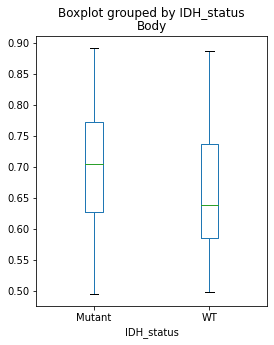

In [ ]:
pd.DataFrame(mlh3_methylation).boxplot(column='Body', by='IDH_status', grid=False, figsize=(4, 5))

Methylation of MLH3 gene body is the same in IDH-mutant and IDH-wild type samples.